Problem Statement:

The objective of this project is to develop a machine learning models that can accurately predict whether a student will graduate or not. 

Data Collection:

Data Source - https://www.kaggle.com/competitions/playground-series-s4e6/overview


Dataset contains total 77 columns and 76518 rows.


Dataset Documentation - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-v0_8-pastel")
import warnings
warnings.filterwarnings('ignore')


In [1]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
train_df=pd.read_csv(r"C:\Users\dnyap\OneDrive\Desktop\MLProject\src\notebook\data\train.csv",index_col='id')
test_df=pd.read_csv(r"C:\Users\dnyap\OneDrive\Desktop\MLProject\src\notebook\data\test.csv",index_col='id')

In [3]:
train_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled


In [ ]:
train_df.isna().sum()

In [ ]:
train_df.duplicated().sum()

In [ ]:
train_df.describe()

In [ ]:
train_df.info()

In [ ]:
plt.figure(figsize=(4,6))
ax=sns.countplot(x='Target',data=train_df,palette='dark')

#adding label to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+3,f'{int(p.get_height())}',ha="center")

plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()

In [ ]:
#Distribution of Target variable
plt.figure(figsize=(4,6))
plt.title("Distribution of Target Variable in %")
plt.pie(train_df.Target.value_counts(),labels=train_df.Target.value_counts().index,explode=[0.1,0.1,0.1],autopct="%1.1f%%",shadow=True)
plt.show()

In [ ]:
train_df.nunique().T

In [4]:
#Seperating categorical features and numerical features
categorical_col=[col for col in train_df.columns if train_df[col].nunique()<=8]

numerical_col=[col for col in train_df.columns if train_df[col].nunique()>=9]

In [5]:
categorical_col

['Marital status',
 'Application order',
 'Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

In [6]:
numerical_col

['Application mode',
 'Course',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [ ]:
plt.figure(figsize=(18,24))

ax=plt.subplot(4,3,1)
sns.countplot(x=train_df['Marital status'],data=train_df,palette='pastel')
plt.xlabel('Marital status')
plt.legend(["1:single", "2 – married","3 – widower","4 – divorced", "5 – facto union", "6 – legally separated"])

ax=plt.subplot(4,3,2)
sns.countplot(x=train_df['Application order'],data=train_df,palette='pastel')
plt.xlabel('Application order')


ax=plt.subplot(4,3,3)
sns.countplot(x=train_df['Daytime/evening attendance'],data=train_df,palette='pastel')
plt.xlabel('Daytime/evening attendance')
plt.legend(["1-Daytime",'2-Evening'])

ax=plt.subplot(4,3,4)
sns.countplot(x=train_df['Displaced'],data=train_df,palette='pastel')
plt.xlabel('Displaced')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,5)
sns.countplot(x=train_df['Educational special needs'],data=train_df,palette='pastel')
plt.xlabel('Educational special needs')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,6)
sns.countplot(x=train_df['Debtor'],data=train_df,palette='pastel')
plt.xlabel('Debtor')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,7)
sns.countplot(x=train_df['Tuition fees up to date'],data=train_df,palette='pastel')
plt.xlabel('Tuition fees up to date')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,8)
sns.countplot(x=train_df['Gender'],data=train_df)
plt.xlabel('Gender')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,9)
sns.countplot(x=train_df['Scholarship holder'],data=train_df,palette='pastel')
plt.xlabel('Scholarship holder')
plt.legend(["1-Yes",'0-No'])

ax=plt.subplot(4,3,10)
sns.countplot(x=train_df['International'],data=train_df,palette='pastel')
plt.xlabel('International')
plt.legend(["1-Yes",'0-No'])

plt.suptitle("Distribution of Categorical Variables",fontsize=30,y=1)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18,24))

ax=plt.subplot(4,3,1)
sns.countplot(x=train_df['Marital status'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Marital status')
plt.figtext(0.2,0.2,["1:single", "2 – married","3 – widower","4 – divorced", "5 – facto union", "6 – legally separated"])

ax=plt.subplot(4,3,2)
sns.countplot(x=train_df['Application order'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Application order')


ax=plt.subplot(4,3,3)
sns.countplot(x=train_df['Daytime/evening attendance'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Daytime/evening attendance')
plt.figtext(0.2,0.2,["1-Daytime",'2-Evening'])

ax=plt.subplot(4,3,4)
sns.countplot(x=train_df['Displaced'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Displaced')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,5)
sns.countplot(x=train_df['Educational special needs'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Educational special needs')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,6)
sns.countplot(x=train_df['Debtor'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Debtor')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,7)
sns.countplot(x=train_df['Tuition fees up to date'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Tuition fees up to date')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,8)
sns.countplot(x=train_df['Gender'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Gender')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,9)
sns.countplot(x=train_df['Scholarship holder'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('Scholarship holder')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

ax=plt.subplot(4,3,10)
sns.countplot(x=train_df['International'],data=train_df,hue=train_df['Target'], palette='bright')
plt.xlabel('International')
plt.figtext(0.2,0.2,["1-Yes",'0-No'])

plt.suptitle("Distribution of Categorical Variables by Target",fontsize=30,y=1)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(train_df[categorical_col],hue='Target',palette='husl')
plt.title()

In [ ]:
plt.figure(figsize=(18,24))
plot_no=1
for col in numerical_col:
    if plot_no<=len(numerical_col):
        ax=plt.subplot(9,3,plot_no)
        sns.kdeplot(train_df[col],color='purple',fill=True)
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        plt.xlabel(col)
        ax.grid(False)

    plot_no+=1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

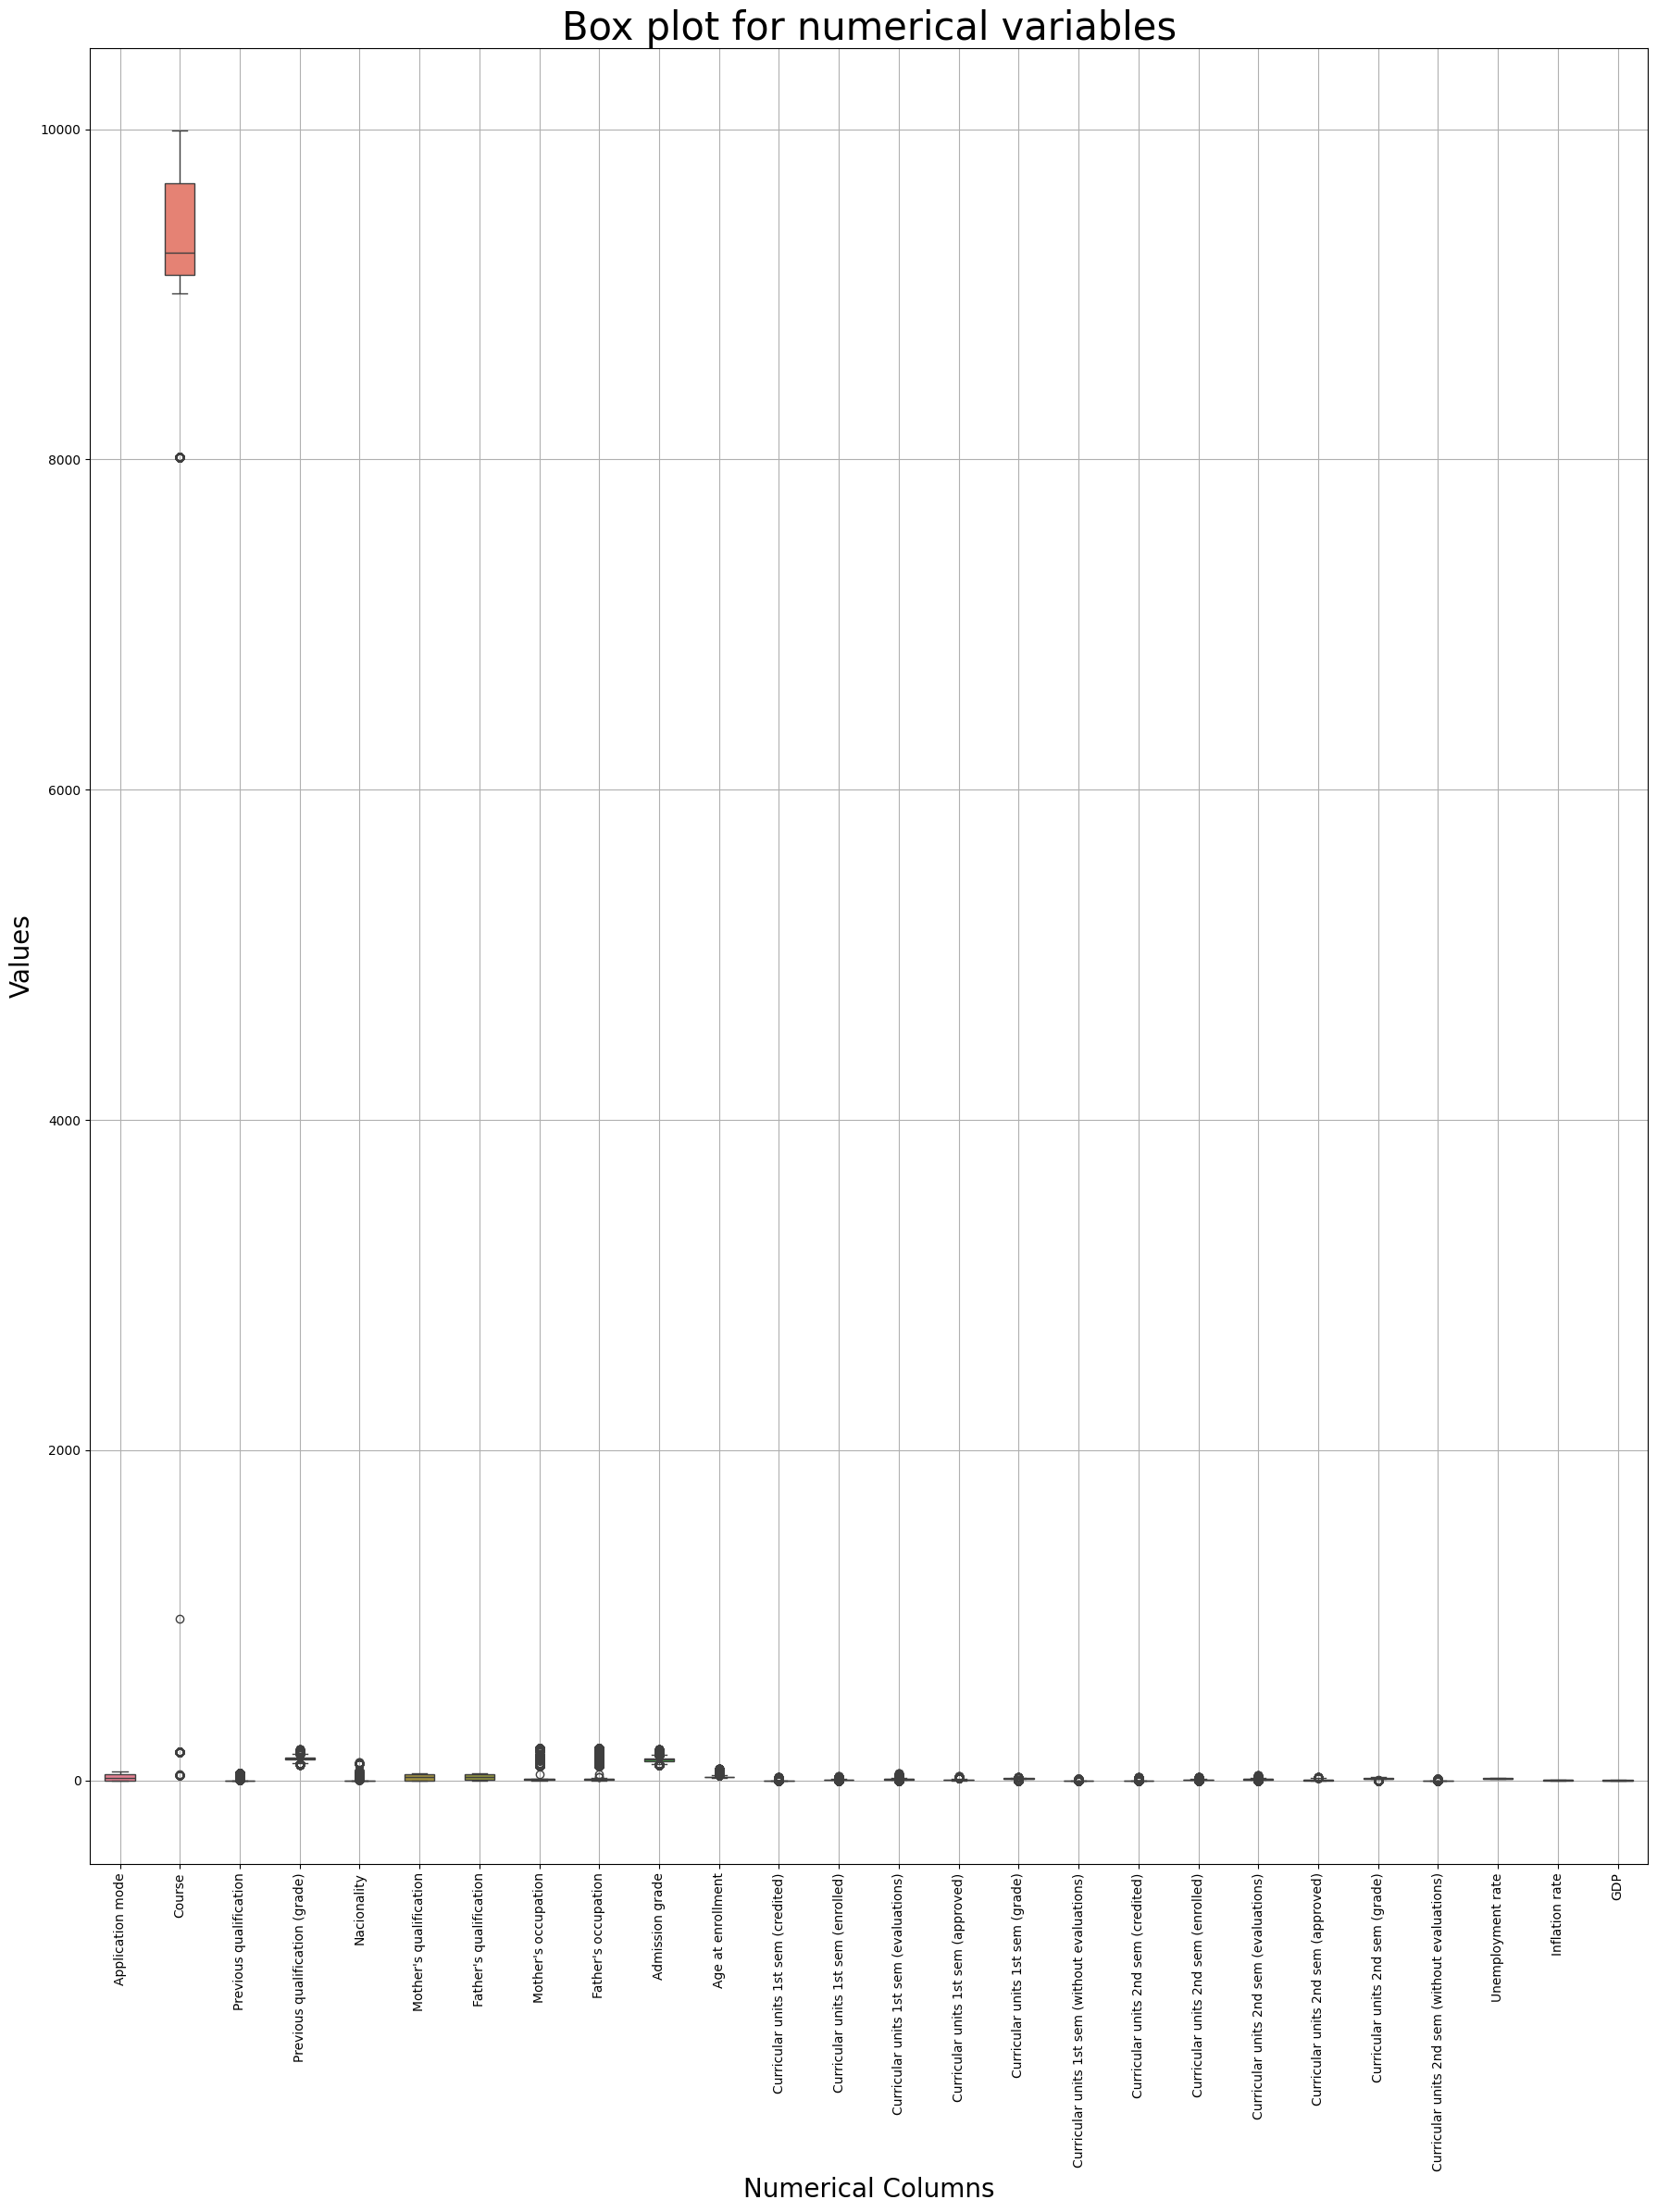

In [84]:
#box plot for numerical variables
plt.figure(figsize=(18,24))
sns.boxplot(data=train_df[numerical_col],orient='v',width=0.5)
plt.title("Box plot for numerical variables",fontsize=30)
plt.xlabel('Numerical Columns', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
from sklearn.preprocessing import LabelEncoder

target_category=['dropout', 'enrolled', 'graduate']
label_encoder=LabelEncoder()

train_df['Target']=label_encoder.fit_transform(train_df['Target'])

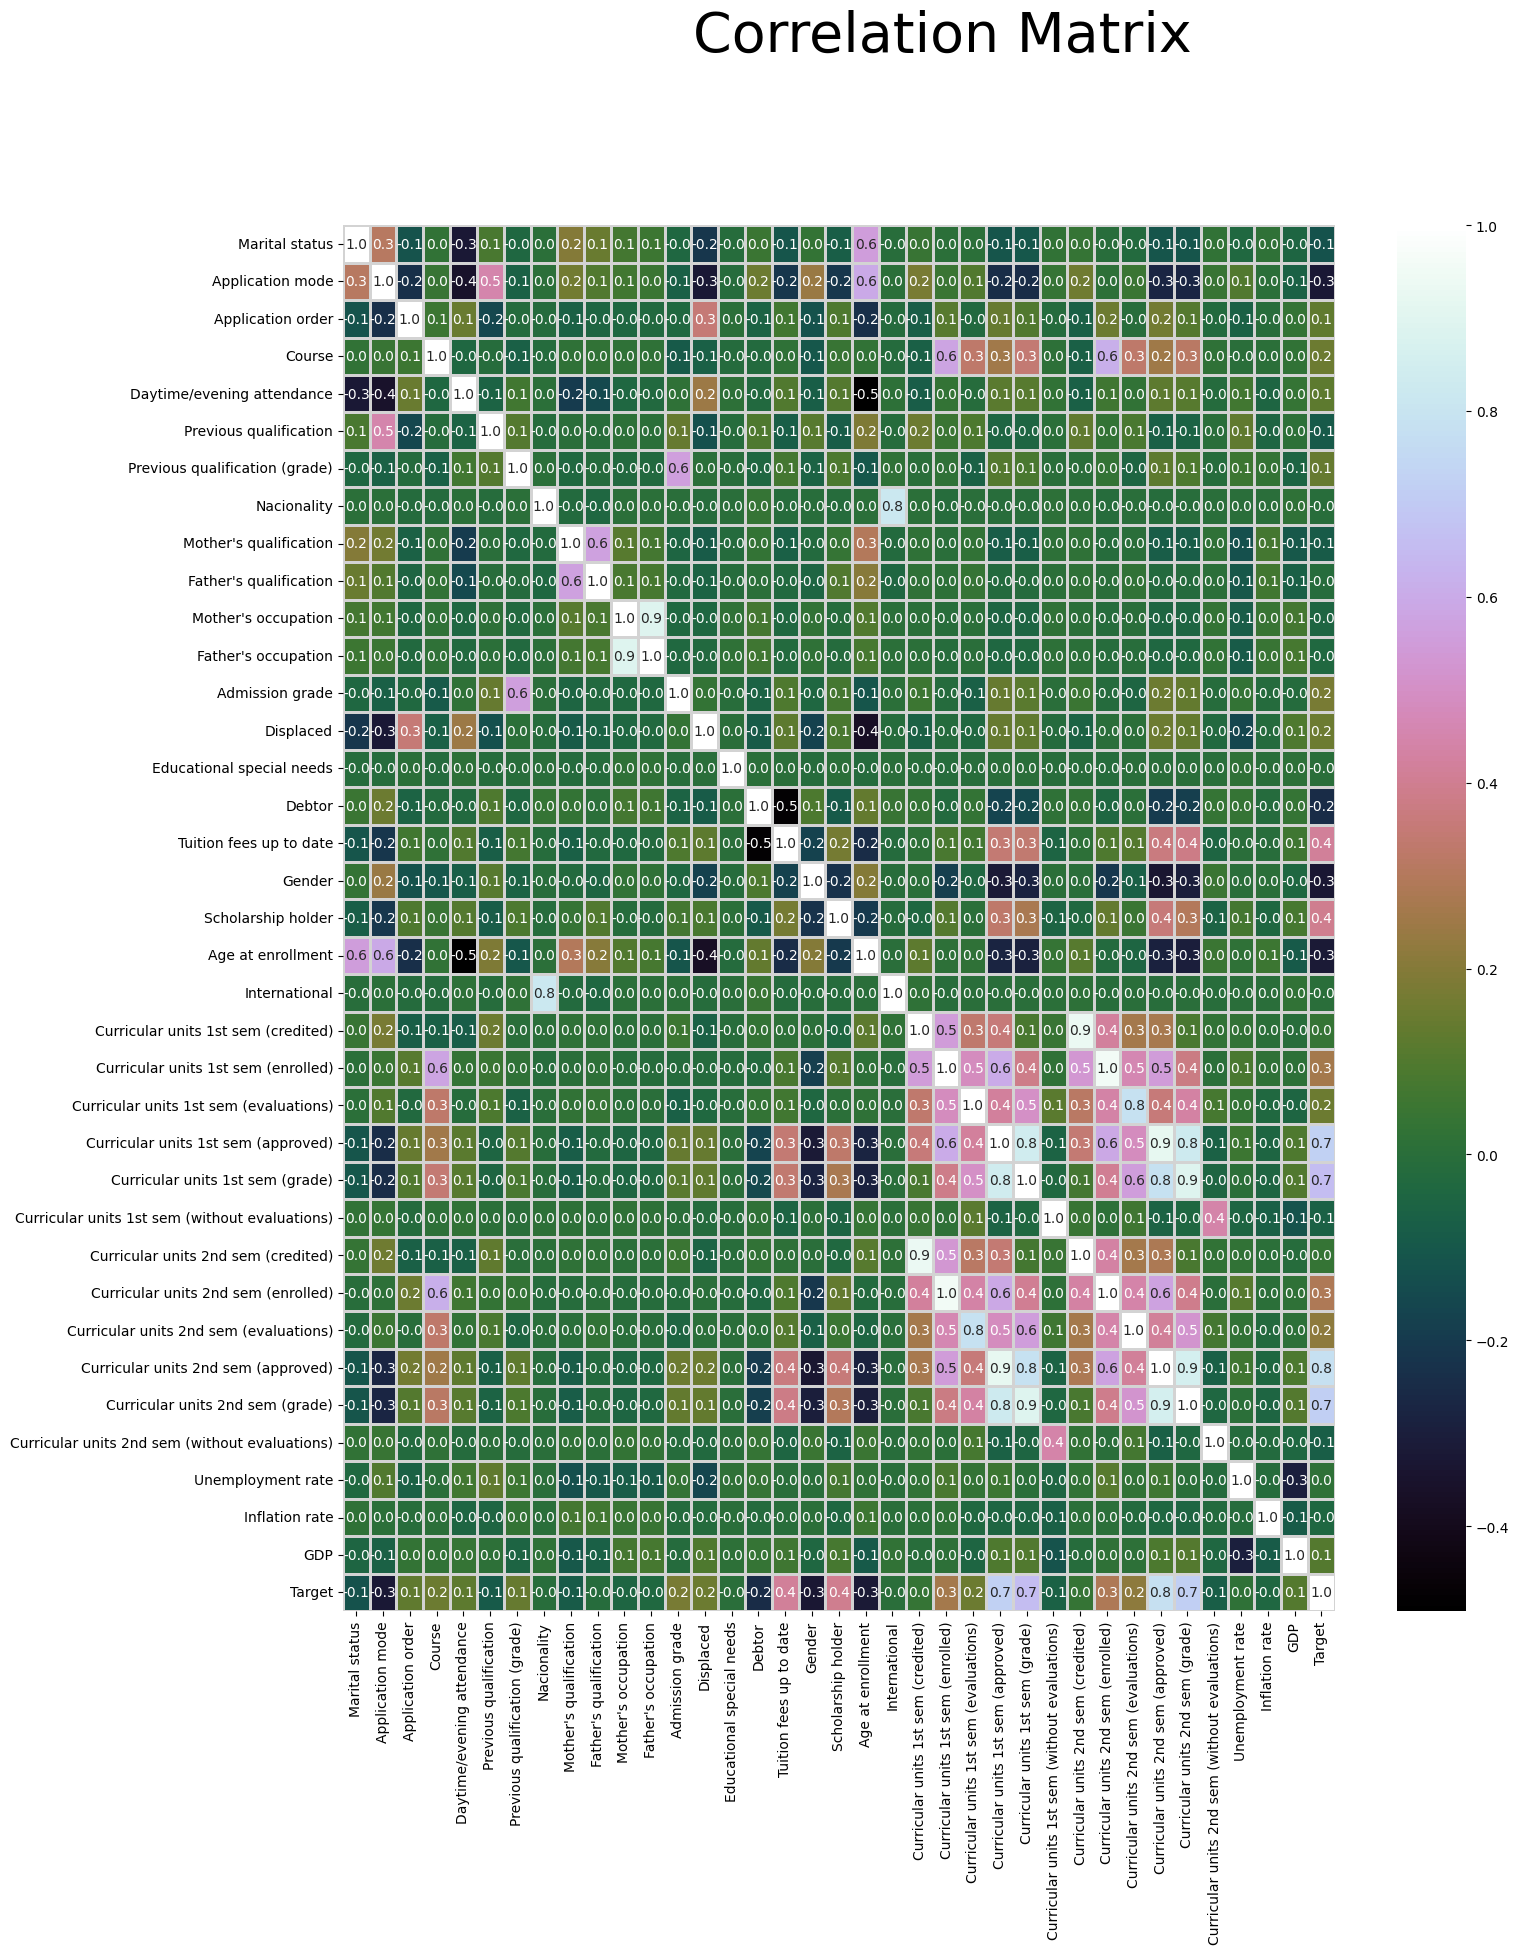

In [88]:
#correlation matrix
plt.figure(figsize=(16, 18))
sns.heatmap(train_df.corr(),annot=True,cmap='cubehelix',fmt='.1f',linewidths=2,linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()